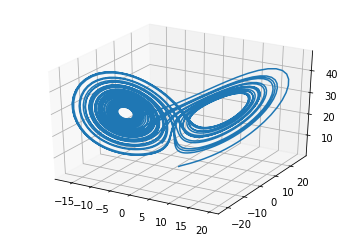

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

In [17]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

font_family = 'Myriad Pro'
title_font = fm.FontProperties(family=font_family, style='normal', size=20, weight='normal', stretch='normal')

save_folder = 'images'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [19]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

In [20]:
# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

In [21]:
# use odeint() to solve a system of ordinary differential equations
# the arguments are: 
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row
xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


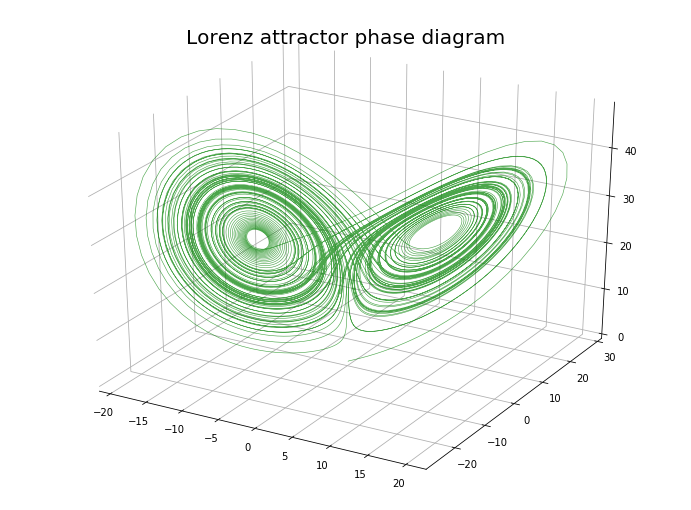

In [22]:
# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)
ax.set_title('Lorenz attractor phase diagram', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor-3d.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


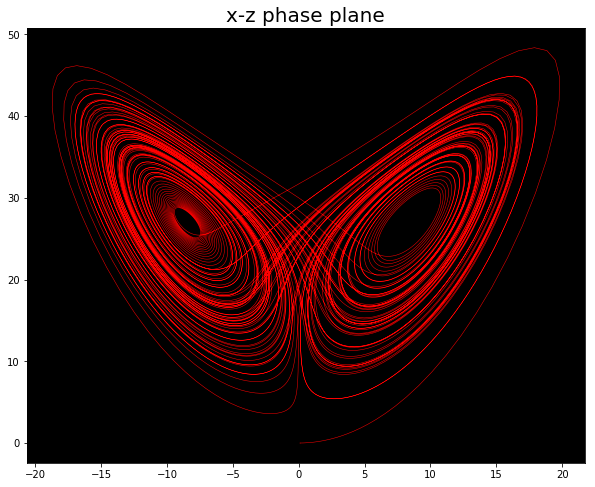

In [49]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(10, 8))

# plot the x values vs the z values
ax.plot(x, z, color='r', alpha=1, linewidth=0.5)
ax.set_title('x-z phase plane', fontproperties=title_font)
# Specify background color for the axis/plot
ax.set_axis_bgcolor("black")

fig.savefig('{}/lorenz-attractor-phase-plane.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()